In [1]:
# 참고 : https://github.com/yojulab/learn_data_analytics/wiki/10.3--CDA
# 참고(scipy api) : https://docs.scipy.org/doc/scipy/reference/stats.html#module-scipy.stats

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rc('font',family='Malgun Gothic')
mpl.rcParams['axes.unicode_minus'] = False
import seaborn as sns
import scipy.stats as stats

In [2]:
df_TOCC = pd.read_csv("../../datasets/UsingChart_TypeOfContractChannel.csv")
df_TOCC[:3]

,id,type_of_contract,type_of_contract2,channel,datetime,Term,payment_type,product,amount,state,overdue_count,overdue,credit rating,bank,cancellation,age,Mileage
0,66758234,렌탈,Normal,서비스 방문,2019-10-20,60,CMS,K1,96900,계약확정,0,없음,9.0,새마을금고,정상,43.0,1862.0
1,66755948,렌탈,Extension_Rental,서비스 방문,2019-10-20,60,카드이체,K1,102900,계약확정,0,없음,2.0,현대카드,정상,62.0,2532.0
2,66756657,렌탈,Normal,홈쇼핑/방송,2019-10-20,60,CMS,K1,96900,계약확정,0,없음,8.0,우리은행,정상,60.0,2363.0


### 범주형/ 연속형 : 범주형 따른 상관관계 확인

#### 선정 변수 : channel(항목2), Mileage\[:2000\](정규분포)
- 분석 내용 : channel중 서비스방문과 홈쇼핑에 따른 마일리지 평균에 차이가 있는가?
    - 귀무가설 : 평균의 차이가 없다.
    - 대립가설 : 평균의 차이가 있다.
- 분석 결론 (기준 : p-value 0.05)
    - 통계 결론 : pvalue=0.936, 귀무가설이 참.
    - 사실 결론 : 평균에 차이가 없다.

In [3]:
## 검증 대상 항목만 필터링 and 2000개만 추출(정규분포 자료 획득) 
condition = (df_TOCC['channel'] == '서비스 방문') | (df_TOCC['channel'] == '홈쇼핑/방송')
df_channel_Mileage = df_TOCC[condition][['channel','Mileage']][:2000]
df_channel_Mileage[:3]

,channel,Mileage
0,서비스 방문,1862.0
1,서비스 방문,2532.0
2,홈쇼핑/방송,2363.0


In [19]:
df_channel_Mileage.isnull().sum()

channel    0
Mileage    0
dtype: int64

In [18]:
df_channel_Mileage = df_channel_Mileage.dropna().copy()

In [20]:
df_channel_Mileage['channel'].value_counts()

서비스 방문    855
홈쇼핑/방송    841
Name: channel, dtype: int64

##### 정규성 검증
- row 객수가 5천개를 기준으로 검증 방식 분리

In [21]:
stats.shapiro(df_channel_Mileage['Mileage'])

ShapiroResult(statistic=0.9926883578300476, pvalue=1.8700838211316295e-07)

<Axes: xlabel='Mileage', ylabel='Count'>

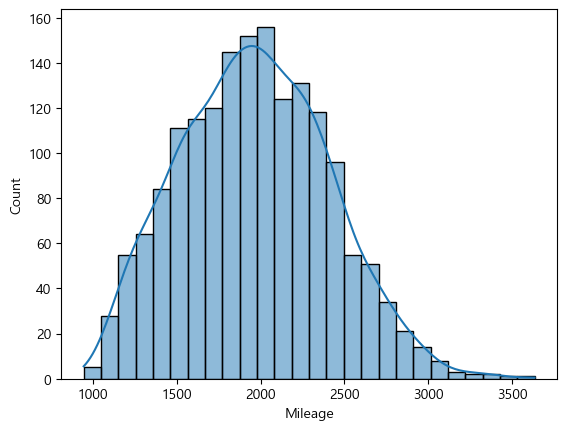

In [22]:
sns.histplot(data=df_channel_Mileage, x='Mileage', kde=True)

##### 등분산 검증
- 분산이 같다.
- 결과 : pvalue=0.74로 등분산이다.

In [23]:
df_service = df_channel_Mileage[df_channel_Mileage['channel'] == '서비스 방문']
df_service[:3]

,channel,Mileage
0,서비스 방문,1862.0
1,서비스 방문,2532.0
5,서비스 방문,2001.0


In [24]:
df_homeshopping = df_channel_Mileage[df_channel_Mileage['channel'] == '홈쇼핑/방송']
df_homeshopping[:3]

,channel,Mileage
2,홈쇼핑/방송,2363.0
6,홈쇼핑/방송,2348.0
10,홈쇼핑/방송,1555.0


<Axes: xlabel='channel', ylabel='count'>

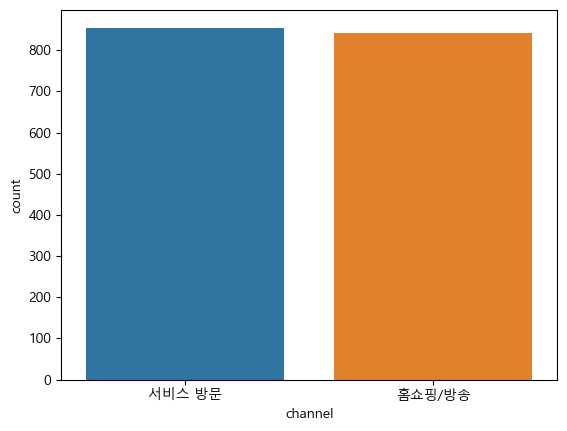

In [25]:
sns.countplot(data=df_channel_Mileage, x='channel')

In [26]:
stats.levene(df_service['Mileage'], df_homeshopping['Mileage'])

LeveneResult(statistic=0.10621828323889944, pvalue=0.7445315946688518)

<Axes: xlabel='Mileage', ylabel='Count'>

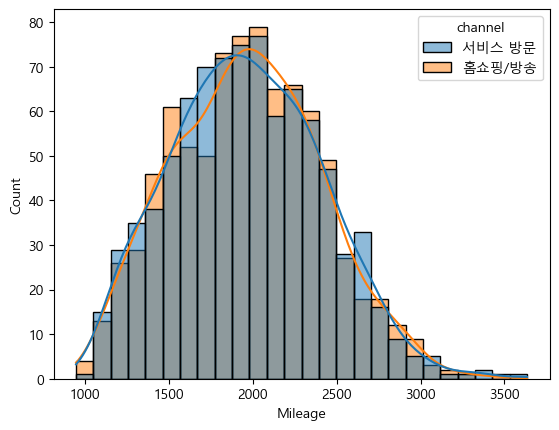

In [27]:
sns.histplot(data=df_channel_Mileage, x='Mileage', kde=True, hue='channel')

In [28]:
stats.ttest_ind(df_service['Mileage'], df_homeshopping['Mileage'], equal_var=True) # 등분산 일때

Ttest_indResult(statistic=-0.08025301134894845, pvalue=0.9360455086241137)

#### 선정 변수 : channel(항목3), Mileage\[:100\](정규분포)
- 분석 내용 : 3가지 채널항목이 Mileage대비 평균의 차이가 있는가?
    - 귀무가설 : 차이가 없다.
    - 대립가설 : 차이가 있다.
- 분석 결론 (기준 : p-value 0.05)
    - 통계 결론 : 귀무가설 참, pvalue=0.13474
    - 사실 결론 : 차이가 없다.

<Axes: xlabel='Mileage', ylabel='Count'>

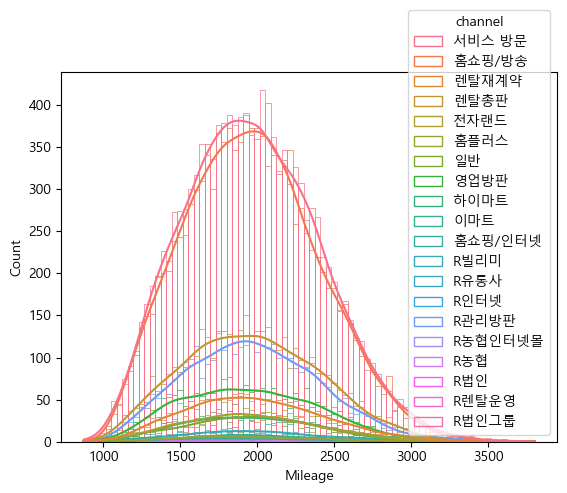

In [31]:
sns.histplot(data=df_TOCC, x='Mileage', kde=True, hue='channel', fill=False)

In [33]:
df_TOCC['channel'].value_counts()[:10]

서비스 방문    15186
홈쇼핑/방송    12977
렌탈총판       5544
R관리방판      4727
하이마트       3227
영업방판       3039
렌탈재계약      2193
일반         1232
전자랜드       1205
R빌리미        560
Name: channel, dtype: int64

In [56]:
conditions = ((df_TOCC['channel'] == '서비스 방문') | (df_TOCC['channel'] == '홈쇼핑/방송') | (df_TOCC['channel'] == '렌탈총판'))
conditions
df_channel3_Mileage =df_TOCC[conditions][['channel', 'Mileage']][:100]

In [59]:
df_channel3_Mileage.isnull().sum()

channel    0
Mileage    0
dtype: int64

In [58]:
df_channel3_Mileage = df_channel3_Mileage.dropna()

##### 정규성 검증
- 5천개 이하일 때 Shapiro

In [60]:
len(df_channel3_Mileage)

86

In [61]:
stats.shapiro(df_channel3_Mileage['Mileage'])  # 정규 분포

ShapiroResult(statistic=0.9740983247756958, pvalue=0.08122798055410385)

##### 등분산 여부 검증

In [62]:
# type(df_channel4_amount['channel'].value_counts())
channel_list = df_channel3_Mileage['channel'].value_counts().index.to_list()
channel_list

['서비스 방문', '홈쇼핑/방송', '렌탈총판']

In [63]:
df_result = [] # list()
for item in channel_list :
    condition = (df_channel3_Mileage['channel'] == item)
    df_result.append(df_channel3_Mileage[condition])   # list index에 DataFrame

In [64]:
df_result[1]

,channel,Mileage
2,홈쇼핑/방송,2363.0
6,홈쇼핑/방송,2348.0
10,홈쇼핑/방송,1555.0
11,홈쇼핑/방송,1503.0
24,홈쇼핑/방송,2947.0
31,홈쇼핑/방송,2409.0
35,홈쇼핑/방송,2375.0
43,홈쇼핑/방송,2131.0
45,홈쇼핑/방송,1543.0
46,홈쇼핑/방송,1606.0


In [65]:
stats.levene(df_result[0]['Mileage'], df_result[1]['Mileage'], df_result[2]['Mileage']) # 등분산

LeveneResult(statistic=0.4360115024917248, pvalue=0.6480826880899435)

##### ANOVA test

In [66]:
stats.f_oneway(df_result[0]['Mileage'], df_result[1]['Mileage'], df_result[2]['Mileage'])

F_onewayResult(statistic=2.0535287401178404, pvalue=0.13474947646424298)